In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [3]:
# Convert to DataFrame
feature_names = [f"Feature_{i}" for i in range(1, 11)]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['Target'], test_size=0.2, random_state=42)

In [5]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predictions
y_pred = rf_model.predict(X_test)

In [7]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



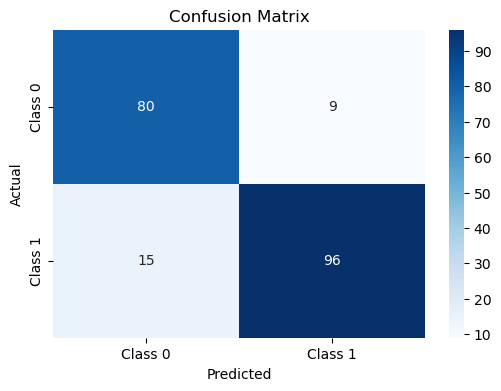

In [8]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_29536\3027715951.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


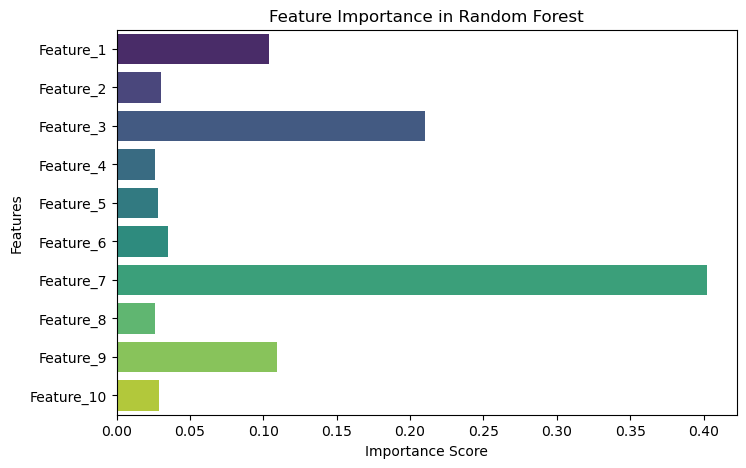

In [9]:
# Feature Importance Plot
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()